In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [46]:
#hello from kebili
#import necessairry libires 
import tensorflow as tf 
from tensorflow.keras import layers
import numpy as np 
import os 
import PIL 
import matplotlib.pyplot as plt 

In [47]:
#check a data exemple of daata 
from PIL import Image 
image_url='/kaggle/input/almond-varieties/dataset/KAPADOKYA/dsd (1).JPG'
img=Image.open(image_url)
img.size

(680, 447)

In [48]:
image_size=224
batch_size=32
channels=3


In [49]:
#set up data 
train_ds=tf.keras.preprocessing.image_dataset_from_directory("/kaggle/input/almond-varieties/dataset",seed=123,subset="training",validation_split=0.2,image_size=(224,224),batch_size=batch_size)

Found 1556 files belonging to 4 classes.
Using 1245 files for training.


In [50]:
class_names=train_ds.class_names
class_names

['AK', 'KAPADOKYA', 'NURLU', 'SIRA']

In [51]:
#set up data 
test_ds=tf.keras.preprocessing.image_dataset_from_directory("/kaggle/input/almond-varieties/dataset",seed=123,subset="validation",validation_split=0.2,image_size=(224,224),batch_size=batch_size)

Found 1556 files belonging to 4 classes.
Using 311 files for validation.


In [89]:
#bulding the resize layer using
resiz_and_rescale=tf.keras.Sequential([
    layers.Resizing(224,224),
    layers.Rescaling(1./225)
])

In [90]:
#add data augmentation using flip 
data_aug=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [91]:
#building model :
model=tf.keras.Sequential([
    data_aug,
    resiz_and_rescale,
    layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,kernel_size=3,activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(256,kernel_size=3,activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(512,kernel_size=3,activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(1024,kernel_size=3,activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(4 , activation = 'softmax'),
])

In [92]:
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [93]:
history=model.fit(train_ds,validation_data=test_ds,epochs=15,verbose=2)

Epoch 1/15
39/39 - 26s - 673ms/step - accuracy: 0.2843 - loss: 1.3925 - val_accuracy: 0.3344 - val_loss: 1.3085
Epoch 2/15
39/39 - 6s - 149ms/step - accuracy: 0.3671 - loss: 1.2947 - val_accuracy: 0.5145 - val_loss: 1.1500
Epoch 3/15
39/39 - 6s - 148ms/step - accuracy: 0.4819 - loss: 1.1309 - val_accuracy: 0.6527 - val_loss: 0.8468
Epoch 4/15
39/39 - 6s - 148ms/step - accuracy: 0.6803 - loss: 0.8005 - val_accuracy: 0.7781 - val_loss: 0.5823
Epoch 5/15
39/39 - 6s - 145ms/step - accuracy: 0.7293 - loss: 0.6387 - val_accuracy: 0.7331 - val_loss: 0.6765
Epoch 6/15
39/39 - 6s - 145ms/step - accuracy: 0.7936 - loss: 0.5136 - val_accuracy: 0.8232 - val_loss: 0.4464
Epoch 7/15
39/39 - 6s - 145ms/step - accuracy: 0.8056 - loss: 0.4848 - val_accuracy: 0.8199 - val_loss: 0.4512
Epoch 8/15
39/39 - 6s - 145ms/step - accuracy: 0.8466 - loss: 0.4182 - val_accuracy: 0.8778 - val_loss: 0.3406
Epoch 9/15
39/39 - 6s - 145ms/step - accuracy: 0.7775 - loss: 0.5660 - val_accuracy: 0.8392 - val_loss: 0.4984


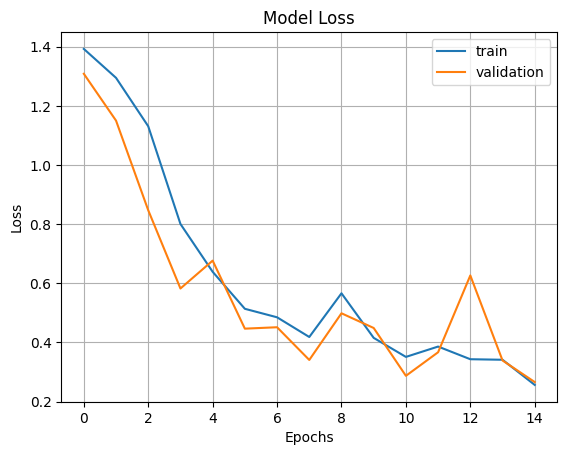

In [95]:
#plot the result 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [96]:
model.save('model1.keras')


In [97]:
#test model after load :
import tensorflow as tf
import numpy as np

# Path to the saved model
model_path = '/kaggle/working/model1.keras'

# Load the model
model = tf.keras.models.load_model(model_path)


In [98]:
image_path1="/kaggle/input/almond-varieties/dataset/KAPADOKYA/dsd (13).JPG"

In [99]:
from tensorflow.keras.preprocessing import image
# Load the image with the target size (replace with your model's expected input size)
img = image.load_img(image_path1, target_size=(image_size, image_size))  # Adjust target_size as needed

# Convert the image to array
img_array1 = image.img_to_array(img)

# Expand the dimensions to match the model's input shape (batch_size, height, width, channels)
img_array1 = np.expand_dims(img_array1, axis=0)

# Normalize the image data (if your model expects normalized data, usually in range [0, 1])
img_array1 = img_array1 / 255.0

In [100]:
# Make predictions
predictions = model.predict(img_array1)

# Print predictions
print(predictions)

# If the model is a classifier and you want to get the class with the highest probability
predicted_class = np.argmax(predictions, axis=1)
print(f'Predicted class: {class_names[predicted_class[0]]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step
[[0.02182285 0.03564308 0.5372193  0.4053148 ]]
Predicted class: NURLU


In [83]:
#add data augmentation using flip 
data_aug=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [76]:
#try it using vgg 
#import resnet50
from keras.applications import ResNet50


In [78]:
# try the process using transferlearning resnet50
resnet = ResNet50(include_top=False, input_shape=(224,224,3))
resnet.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_11[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [79]:
for layer in resnet.layers:
    layer.trainable=False
print("Number of trainable parameters:",len(vgg.trainable_variables))

Number of trainable parameters: 212


In [86]:
#new model :
resnet_model=tf.keras.Sequential([
    data_aug,
    resiz_and_rescale,
    resnet,
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(64,activation='softmax'),
    tf.keras.layers.Dense(4,activation='softmax')
    
])

In [87]:
adam = tf.keras.optimizers.Adam(0.01)
loss = tf.keras.losses.SparseCategoricalCrossentropy()

resnet_model.compile(loss=loss, optimizer= adam,metrics=['accuracy'])

In [88]:
history1=resnet_model.fit(train_ds,validation_data=test_ds,epochs=10,verbose=2)

Epoch 1/10
39/39 - 25s - 630ms/step - accuracy: 0.2683 - loss: 1.3862 - val_accuracy: 0.3344 - val_loss: 1.3734
Epoch 2/10
39/39 - 7s - 167ms/step - accuracy: 0.2900 - loss: 1.3774 - val_accuracy: 0.3344 - val_loss: 1.3720
Epoch 3/10
39/39 - 7s - 168ms/step - accuracy: 0.2900 - loss: 1.3778 - val_accuracy: 0.3344 - val_loss: 1.3723
Epoch 4/10
39/39 - 7s - 168ms/step - accuracy: 0.2900 - loss: 1.3781 - val_accuracy: 0.3344 - val_loss: 1.3752
Epoch 5/10
39/39 - 6s - 166ms/step - accuracy: 0.2635 - loss: 1.3796 - val_accuracy: 0.3344 - val_loss: 1.3746
Epoch 6/10
39/39 - 6s - 165ms/step - accuracy: 0.2900 - loss: 1.3789 - val_accuracy: 0.3344 - val_loss: 1.3716
Epoch 7/10
39/39 - 6s - 163ms/step - accuracy: 0.2900 - loss: 1.3785 - val_accuracy: 0.3344 - val_loss: 1.3742
Epoch 8/10
39/39 - 6s - 163ms/step - accuracy: 0.2715 - loss: 1.3782 - val_accuracy: 0.3344 - val_loss: 1.3730
Epoch 9/10
39/39 - 6s - 162ms/step - accuracy: 0.2900 - loss: 1.3793 - val_accuracy: 0.3344 - val_loss: 1.3740


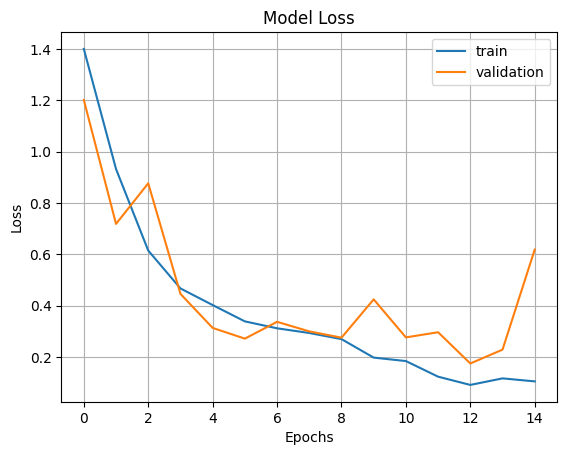

In [71]:
#plot the result 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()